# Breast Cancer analysis

Importing data and stuff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
Breast_DF = pd.read_pickle("E:/Breast_Data_Preprocessed_NORUBBERBAND")

Quick look at some of the data

In [3]:
Breast_DF.head(7)

1000  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   -0.688987   
                                                              B4   -0.647203   
                                                              B4   -0.594970   
                                                              B4   -0.520894   
                                                              B4   -0.463241   
                                                              B4   -0.435971   
                                                              B4   -0.425147   

                                                                        1004  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   -0.648069   
                                                              B4   -0.606942   
                                                              B4   -0.555661   
                                                              B4   -0.483092   
                                                              B4   -0.426212   
                                                              B4   -0.398098   
                                                              B4   -0.384879   

                                                                        1008  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   -0.625340   
                                                              B4   -0.584670   
                                                              B4   -0.535717   
                                                              B4   -0.465282   
                                                              B4   -0.409872   
                                                              B4   -0.384438   
                                                              B4   -0.371064   

                                                                        1012  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   -0.607801   
                                                              B4   -0.567944   
                                                              B4   -0.520738   
                                                              B4   -0.452160   
                                                              B4   -0.397803   
                                                              B4   -0.374955   
                                                              B4   -0.362071   

                                                                        1016  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   -0.589506   
                                                              B4   -0.550220   
                                                              B4   -0.504858   
                                                              B4   -0.439263   
                                                              B4   -0.386852   
                                                              B4   -0.366670   
                                                              B4   -0.354068   

                                                                        1020  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   -0.565772   
                                                              B4   -0.527047   
                                                              B4   -0.483315   
                                                              B4   

<Figure size 432x288 with 0 Axes>

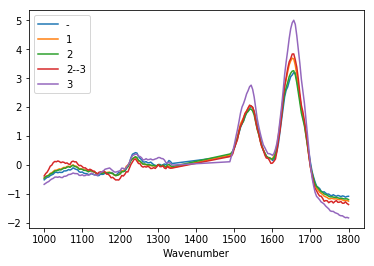

In [22]:
plt.clf()
fig = plt.figure()
fig.patch.set_facecolor([1,1,1])

for name, df in Breast_DF.groupby(level = "Grade"):
    
    plt.plot(df.mean(axis = 0), label = name)

plt.xlabel("Wavenumber")
plt.legend()
plt.show()

# "Cool" stuff

In [4]:
# Import your models and stuff here. A good range of models to try are: naive_bayes, random forest, decision trees, SVMs and maybe K_nearest neighbours?

from sklearn.model_selection import KFold, GroupKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
# This lets you run the analysis on a smaller dataset (usually sampled randomly) to test things
# you can just get rid of the .sample bit to use the entire dataset once you're happy.

Breast_DF_sample = Breast_DF.sample(1000)

Y = Breast_DF_sample.reset_index()["Stage"] # Change Stage to whatever you want to predict instead.
X = Breast_DF_sample.values
grouping = Breast_DF_sample.reset_index()["Core"]

In [17]:
# You can use whatever metrics you want, there is a way to write your own, 
# just check the sklearn documentation it's in there somewhere 

from sklearn.metrics import recall_score, roc_auc_score

In [23]:
from sklearn.preprocessing import LabelBinarizer

In [26]:
lb = LabelBinarizer()
lb.fit(Y)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [31]:
Y.sample(10)

111716     IIb
28295      IIa
42476      IIa
14831      IIa
108205    IIIa
252054       -
161415     IIa
246378     IIa
184384     IIa
214646     IIa
Name: Stage, dtype: object

In [30]:
lb.transform(Y.sample(10))

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]])

In [28]:
LDA = LinearDiscriminantAnalysis()
recalls = []

results = dict()

for i, name in enumerate(np.unique(Y)):
    for train_index, test_index in GroupKFold(2).split(X, Y, grouping):
        
        print(i, name)

        X_train = X[train_index]
        X_test =  X[test_index]

        Y_train, Y_test = Y[train_index], Y[test_index]

        LDA.fit(X_train, Y_train)
        predictions = LDA.predict(X_test)

        recalls.append(recall_score(Y_test, predictions, average = "weighted"))

        #print(roc_auc_score(Y_test, predictions))
        print(recall_score(Y_test, predictions, average = "weighted"))

    # Try and use numpy arrays for everything you can, they're a lot faster and have loads of really useful
    # functions to do statistical stuff.
    
    results[name] = np.array(recalls).mean()

    print(np.array(recalls).mean())

0 -


C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.6190938269761886
0 -


C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.5703054052372956
0.5946996161067422
1 I


KeyboardInterrupt: 